### EDA For Companies in Russia Data Set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
country_data = pd.read_csv('../data/companies.csv')
country_data.head()

,Name,Action,Industry,Country,Grade
0,Agrana,continue operating plant in Russia,Consumer Staples,Austria,F
1,Agricultural Bank of China,Russian companies open accounts with the bank;...,Financials,China,F
2,Air China,still flying to Russia,Industrials,China,F
3,Air Serbia,still flying to Russia,Industrials,Serbia,F
4,Alibaba,still operating in Russia,Consumer Discretionary,China,F


In [5]:
country_data.describe()

,Name,Action,Industry,Country,Grade
count,1581,1581,1581,1581,1581
unique,1581,1128,12,67,5
top,Agrana,still operating in Russia,Industrials,United States,A
freq,1,53,403,457,521


In [6]:
industry_counts = country_data['Industry'].value_counts()
total_companies = len(country_data)

industry_percentages = industry_counts / total_companies * 100
print(round(industry_percentages, 2))

Industrials               25.49
Consumer Discretionary    19.80
Information Technology    12.33
Consumer Staples          10.56
Financials                 8.22
Materials                  6.14
Communication Services     4.62
Health Care                4.43
Energy                     3.92
NGO                        2.53
Utilities                  1.08
Real Estate                0.89
Name: Industry, dtype: float64


Text(0, 0.5, 'Percentage of Total')

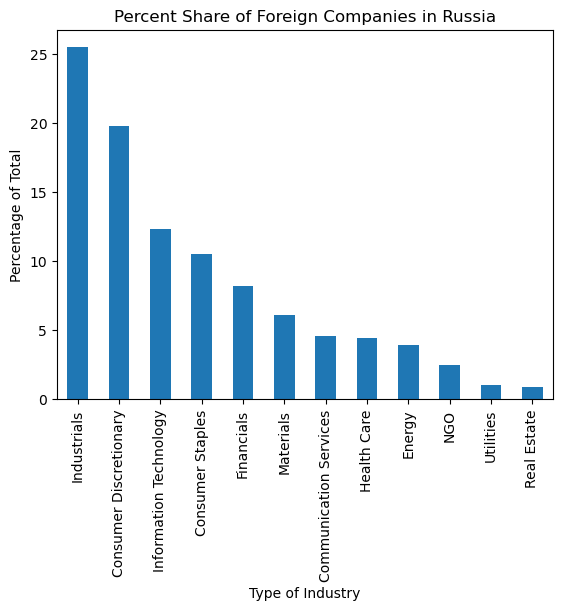

In [7]:
industry_percentages.plot(kind='bar')

plt.title('Percent Share of Foreign Companies in Russia')
plt.xlabel('Type of Industry')
plt.ylabel('Percentage of Total')

The above chart demonstrates a question about the research.  How best to demonstrate which company industries are significant outliers for behavior given their share of the total industry.  i.e. Industrials are the primary foreign company in Russia and so it looks in each letter grade that they are the highest represented category.

Now I want to narrow my focus to the top six industries.

In [8]:
top_industries = industry_counts.head(6).index.tolist()

focused_data = country_data[country_data['Industry'].isin(top_industries)]

#Verify that this only shows data from the six biggest categories: Industrials, Consumer Disc., IT, Consumer Staples, Financials, Materials
print(focused_data.head(30))

                                         Name  \
0                                      Agrana   
1                  Agricultural Bank of China   
2                                   Air China   
3                                  Air Serbia   
4                                     Alibaba   
6                                 Alpina Žiri   
7                                      Alumil   
8                                Anadolu Efes   
9                                   ANT Group   
10                                Anta Sports   
11                                      Antal   
12                           AnyDesk Software   
13                              Ariston Group   
14                              Auchan-Retail   
15                     AUMA Riester GmbH & Co   
17                                    Babolat   
18                                 Bajaj Auto   
19                                   Benetton   
22                                      Boggi   
23                  

In [9]:
#Recalculate Data to show percentages of total with only these six categories
top_six_industries = focused_data['Industry'].value_counts()
top_six_percentages = top_six_industries / len(country_data) * 100

print(round(top_six_percentages, 2))

Industrials               25.49
Consumer Discretionary    19.80
Information Technology    12.33
Consumer Staples          10.56
Financials                 8.22
Materials                  6.14
Name: Industry, dtype: float64


### These percentages reflect the percentage of each industry as a whole of all foreign-owned companies operating in Russia.

### In total these six categories compose 82.54% of the total of all foreign-owned companies.


Text(0, 0.5, 'Percentage of Total')

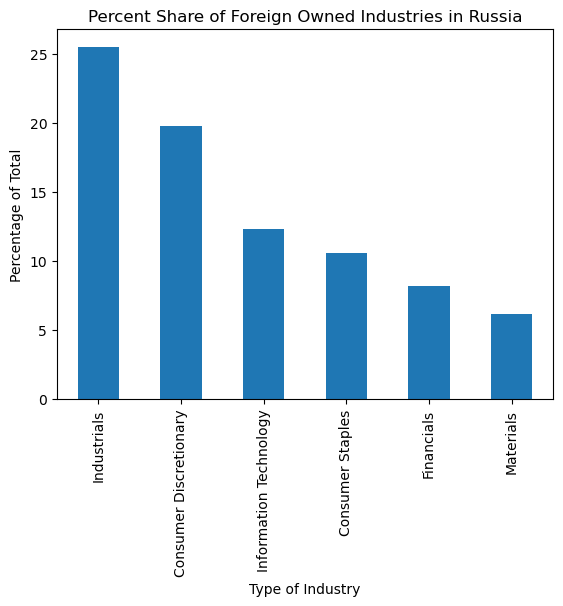

In [10]:
top_six_percentages.plot(kind='bar')

plt. title('Percent Share of Foreign Owned Industries in Russia')
plt.xlabel('Type of Industry')
plt.ylabel('Percentage of Total')

In [11]:
"This code groups by industry and shows how many of each grade that industry received."

industry_grades = country_data.groupby('Industry')['Grade'].value_counts()
print(industry_grades)

Industry                Grade
Communication Services  B         28
                        A         26
                        F          8
                        C          7
                        D          4
Consumer Discretionary  B        130
                        A         88
                        F         51
                        C         23
                        D         21
Consumer Staples        A         54
                        B         41
                        D         38
                        F         23
                        C         11
Energy                  A         21
                        F         16
                        D         10
                        B          8
                        C          7
Financials              A         45
                        B         35
                        C         24
                        F         15
                        D         11
Health Care             D         32
        

In [12]:
# Grade A by percentage of the total in the 6 biggest categories.

grade_A_count = focused_data[focused_data['Grade'] == 'A'].groupby('Industry')['Grade'].count()

industry_percent_A = grade_A_count / len(focused_data) * 100

industry_percent_A_sorted = industry_percent_A.sort_values(ascending=False)

print(round(industry_percent_A_sorted, 2))

Industry
Industrials               11.57
Consumer Discretionary     6.74
Information Technology     4.90
Consumer Staples           4.14
Financials                 3.45
Materials                  2.68
Name: Grade, dtype: float64


In [13]:
# Trying here to lock in the order in which industries are displayed to provide consistency between grades A & F.

grade_A_count = focused_data[focused_data['Grade'] == 'A'].groupby('Industry')['Grade'].count()

industry_percent_A = grade_A_count / len(focused_data) * 100

custom_order = ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Financials', 'Materials']

industry_percent_A_sorted = industry_percent_A.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(industry_percent_A_sorted, 2))

Industry
Industrials               11.57
Consumer Discretionary     6.74
Information Technology     4.90
Consumer Staples           4.14
Financials                 3.45
Materials                  2.68
Name: Grade, dtype: float64


(0.0, 12.0)

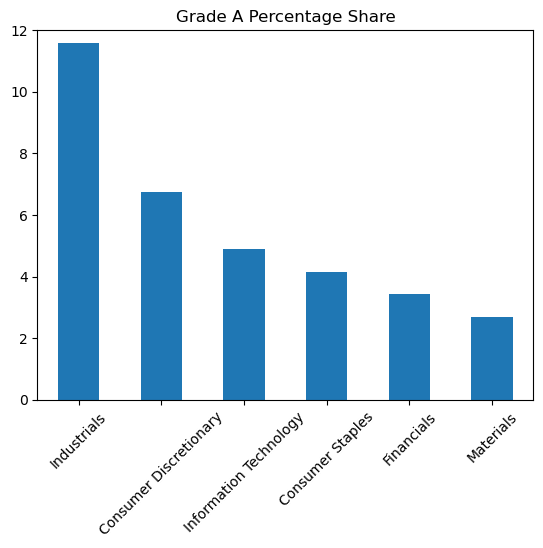

In [28]:
industry_percent_A_sorted.plot(kind='bar')

plt.title('Grade A Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 12])

In [14]:
# Grade B by percentage of the total in the 6 biggest categories.

grade_B_count = focused_data[focused_data['Grade'] == 'B'].groupby('Industry')['Grade'].count()

industry_percent_B = grade_B_count / len(focused_data) * 100

custom_order = ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Financials', 'Materials']

industry_percent_B_sorted = industry_percent_B.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(industry_percent_B_sorted, 2))

Industry
Industrials               9.04
Consumer Discretionary    9.96
Information Technology    7.13
Consumer Staples          3.14
Financials                2.68
Materials                 1.46
Name: Grade, dtype: float64


(0.0, 12.0)

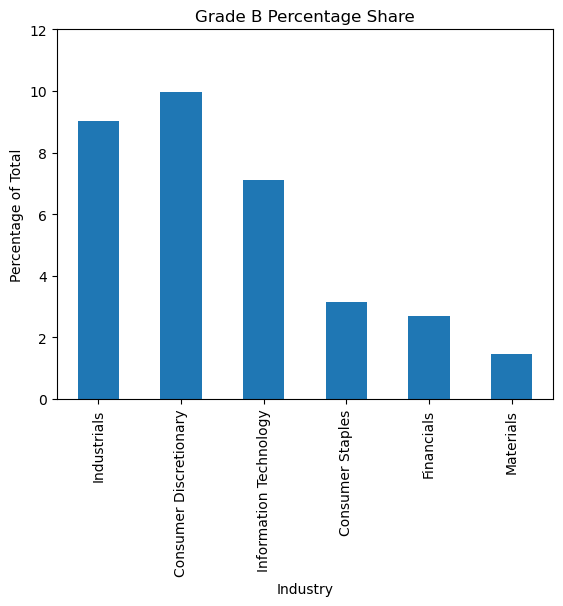

In [15]:
industry_percent_B_sorted.plot(kind='bar')

plt.title('Grade B Percentage Share')
plt.xlabel('Industry')
plt.ylabel('Percentage of Total')

plt.ylim([0, 12])

In [16]:
# Grade C by percentage of the total in the 6 biggest categories.

grade_C_count = focused_data[focused_data['Grade'] == 'C'].groupby('Industry')['Grade'].count()

industry_percent_C = grade_C_count / len(focused_data) * 100

custom_order = ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Financials', 'Materials']

industry_percent_C_sorted = industry_percent_C.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(industry_percent_C_sorted, 2))

Industry
Industrials               2.91
Consumer Discretionary    1.76
Information Technology    1.15
Consumer Staples          0.84
Financials                1.84
Materials                 1.00
Name: Grade, dtype: float64


(0.0, 12.0)

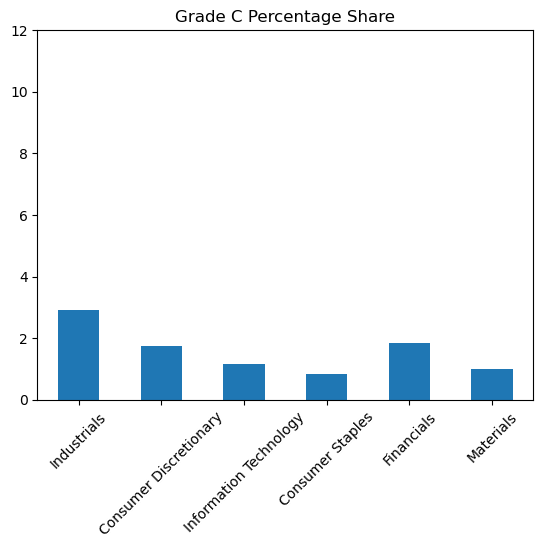

In [32]:
industry_percent_C_sorted.plot(kind='bar')

plt.title('Grade C Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 12])

In [18]:
# Grade D by percentage of the total in the 6 biggest categories.

grade_D_count = focused_data[focused_data['Grade'] == 'D'].groupby('Industry')['Grade'].count()

industry_percent_D = grade_D_count / len(focused_data) * 100

custom_order = ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Financials', 'Materials']

industry_percent_D_sorted = industry_percent_D.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(industry_percent_D_sorted, 2))

Industry
Industrials               2.45
Consumer Discretionary    1.61
Information Technology    0.84
Consumer Staples          2.91
Financials                0.84
Materials                 0.92
Name: Grade, dtype: float64


(0.0, 12.0)

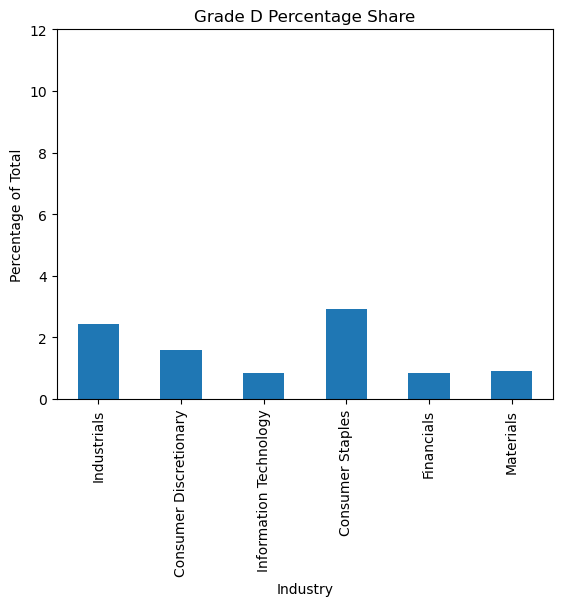

In [19]:
industry_percent_D_sorted.plot(kind='bar')

plt.title('Grade D Percentage Share')
plt.xlabel('Industry')
plt.ylabel('Percentage of Total')

plt.ylim([0, 12])

In [15]:
# Grade F by percentage of the total in the 6 biggest categories.

grade_F_count = focused_data[focused_data['Grade'] == 'F'].groupby('Industry')['Grade'].count()

industry_percent_F = grade_F_count / len(focused_data) * 100

custom_order = ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Financials', 'Materials']

industry_percent_F_sorted = industry_percent_F.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(industry_percent_F_sorted, 2))

Industry
Industrials               4.90
Consumer Discretionary    3.91
Information Technology    0.92
Consumer Staples          1.76
Financials                1.15
Materials                 1.38
Name: Grade, dtype: float64


(0.0, 12.0)

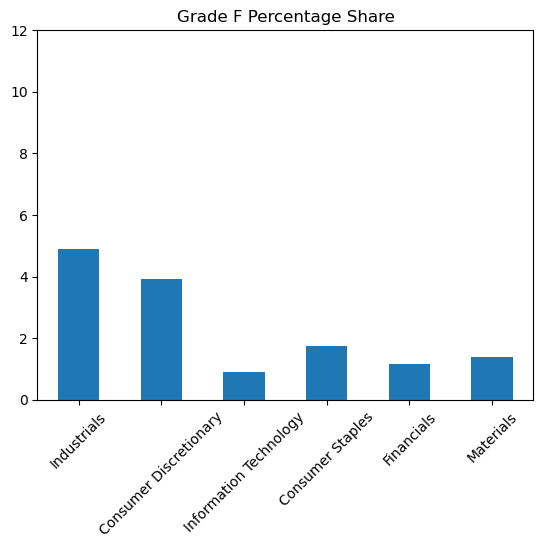

In [16]:
industry_percent_F_sorted.plot(kind='bar')

plt.title('Grade F Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 12])
